# Illustrations for using Neural Nets for Approximation on the Sine Curve
Author: Joerg Kienitz (finciraptor.de, https://github.com/Lapsilago)
for the workshop Machine Learning for Option Pricing, Calibration and Hedging Workshop 
with Nikolai Nowaczyk ( https://github.com/niknow; https://github.com/niknow/machine-learning-examples )

In [1]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential

import matplotlib.pyplot as plt
# for visualization
#from ann_visualizer.visualize import ann_viz;


Using TensorFlow backend.


In [2]:
x = 2* np.pi * np.random.rand(100) #np.arange(0,np.pi*2,.1)

y = np.sin(x)                 # standard sine function
ytransform = (np.sin(x)+1)/2  # transform the value space to [0,1]

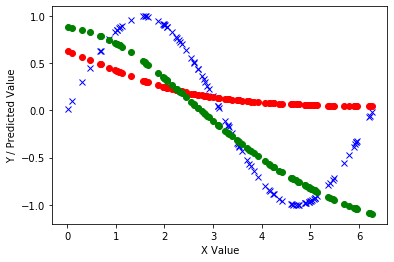

In [3]:
# wrong activation function -> sigmoid has values between 0 and 1...
model = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('sigmoid'),
    Dense(1),
    Activation('sigmoid')
])

model.compile(loss='mean_squared_error', optimizer='SGD')
model.fit(x, y, epochs=50, batch_size=1, verbose=0)

preds = model.predict(x)

model2 = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('sigmoid'),
    Dense(1)
])

model2.compile(loss='mean_squared_error', optimizer='SGD', metrics=['accuracy'])
model2.fit(x, y, epochs=50, batch_size=1, verbose=0)

preds2 = model2.predict(x)

plt.plot(x, y, 'bx', x, preds, 'ro', x, preds2, 'go')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.show()

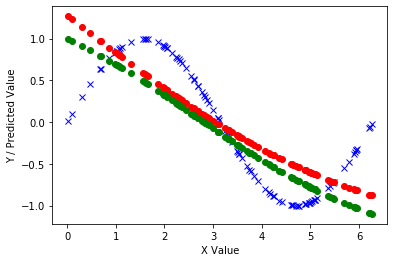

In [4]:
# transformation only
model = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('sigmoid'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='SGD')
model.fit(x, y, epochs=50, batch_size=1, verbose=0)

preds = model.predict(x)

model2 = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('sigmoid'),
    Dense(1)
])

model2.compile(loss='mean_squared_error', optimizer='SGD')
model2.fit(x, ytransform, epochs=50, batch_size=1, verbose=0)

preds2 = model2.predict(x)

plt.plot(x, y, 'bx', x, preds, 'ro', x, 2*preds2-1, 'go')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.show()

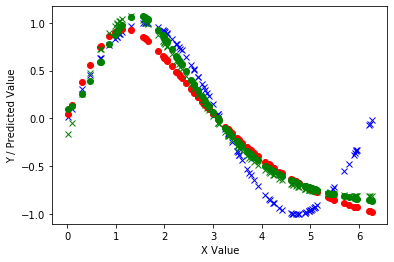

In [5]:
#transformation (ytransform instead of y) and using different activation
model = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('sigmoid'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='Adam')
model.fit(x, ytransform, epochs=100, batch_size=1, verbose=0)

preds = model.predict(x)

model2 = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('tanh'),
    Dense(1)
])

model2.compile(loss='mean_squared_error', optimizer='Adam')
model2.fit(x, y, epochs=100, batch_size=1, verbose=0)

preds2 = model2.predict(x)

model3 = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('tanh'),
    Dense(1)
])

model3.compile(loss='mean_squared_error', optimizer='Adam')
model3.fit(x, ytransform, epochs=100, batch_size=1, verbose=0)

preds3 = model3.predict(x)

# comparing the predictions of both models
plt.plot(x, 2*ytransform-1, 'bx', x, 2*preds-1, 'ro', x, preds2, 'go', x, 2*preds3-1, 'gx')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.show()

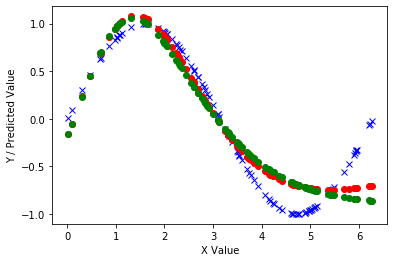

In [6]:
#adding more hidden layers 
model = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('tanh'),
    Dense(10, input_shape=(1,)),
    Activation('tanh'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='Adam')
model.fit(x, ytransform, epochs=100, batch_size=1, verbose=0)

preds = model.predict(x)

model2 = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('tanh'),
    Dense(1)
])

model2.compile(loss='mean_squared_error', optimizer='Adam')
model2.fit(x, ytransform, epochs=100, batch_size=1, verbose=0)

preds2 = model2.predict(x)

# comparing the predictions of both models
plt.plot(x, 2*ytransform-1, 'bx', x, 2*preds-1, 'ro', x, 2*preds2-1, 'go')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.show()

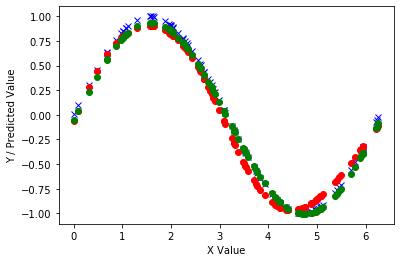

In [7]:
#adding more epochs
model = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('tanh'),
    Dense(10, input_shape=(1,)),
    Activation('tanh'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='Adam')
model.fit(x, ytransform, epochs=100, batch_size=1, verbose=0)

preds = model.predict(x)

model2 = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('tanh'),
    Dense(10, input_shape=(1,)),
    Activation('tanh'),
    Dense(1)
])
model2.compile(loss='mean_squared_error', optimizer='Adam')
model2.fit(x, ytransform, epochs=1000, batch_size=1, verbose=0)

preds2 = model2.predict(x)

# comparing the predictions of both models
plt.plot(x, 2*ytransform-1, 'bx', x, 2*preds-1, 'ro', x, 2*preds2-1, 'go')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.show()

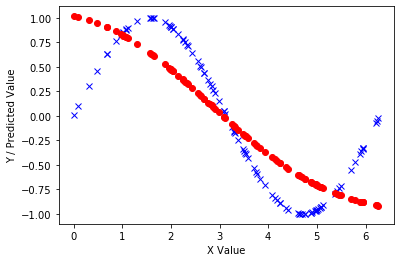

In [8]:
# now, using scaled data for x -> xscale and y -> yscale
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

xscale = np.reshape(x,(-1, 1))
yscale = np.sin(xscale)
xscale = x_scaler.fit_transform(xscale)
yscale = y_scaler.fit_transform(yscale)

model = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('tanh'),
    Dense(10, input_shape=(1,)),
    Activation('tanh'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='SGD')
model.fit(xscale, yscale, epochs=100, batch_size=1, verbose=0)

preds_scale = model.predict(xscale)
preds = y_scaler.inverse_transform(preds_scale)

plt.plot(x, y, 'bx', x, preds, 'ro')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.show()


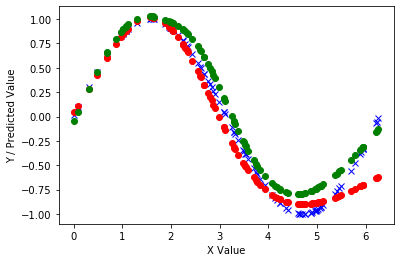

In [9]:
#adding more nodes to the hidden layers 
model = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('tanh'),
    Dense(10, input_shape=(1,)),
    Activation('tanh'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='Adam')
model.fit(x, ytransform, epochs=100, batch_size=1, verbose=0)

preds = model.predict(x)

model2 = Sequential([
    Dense(20, input_shape=(1,)),
    Activation('tanh'),
    Dense(20, input_shape=(1,)),
    Activation('tanh'),
    Dense(1)
])

model2.compile(loss='mean_squared_error', optimizer='Adam')
model2.fit(x, ytransform, epochs=100, batch_size=1, verbose=0)

preds2 = model2.predict(x)

# comparing the predictions of both models
plt.plot(x, 2*ytransform-1, 'bx', x, 2*preds-1, 'ro', x, 2*preds2-1, 'go')
#plt.plot(x, 2*ytransform-1, 'bx', x, 2*preds-1, 'ro')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.show()

In [10]:
#ann_viz(model)

mean_squared_error: 3.90%


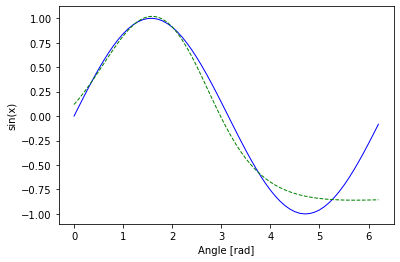

In [11]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pylab as plt

# Create dataset
x = np.arange(0, np.pi * 2, 0.1)
y = np.sin(x)

# Some parameters
act_fun = 'tanh'
NBatch = 1

# Create the model
model = Sequential()
model.add(Dense(5, input_shape=(1,), activation=act_fun))
model.add(Dense(5, activation=act_fun))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_squared_error'])

# Fit the model
model.fit(x, y, epochs=100, batch_size=NBatch, verbose=0)

# Evaluate the model
scores = model.evaluate(x, y, verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

# Make predictions
y_pred = model.predict(x)

# Plot
plt.plot(x, y, color='blue', linewidth=1, markersize='1')
plt.plot(x, y_pred, 'g--', linewidth=1, markersize='1')
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

mean_squared_error: 49.17%


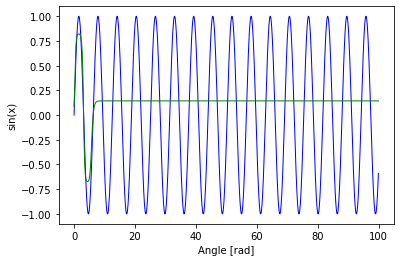

In [12]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pylab as plt

# Create dataset
x = np.arange(0, 100, 0.1)
y = np.sin(x)

# Some parameters
act_fun = 'tanh'
NBatch = 1

# Create the model
model = Sequential()
model.add(Dense(5, input_shape=(1,), activation=act_fun))
model.add(Dense(5, activation=act_fun))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_squared_error'])

# Fit the model
model.fit(x, y, epochs=1000, batch_size=NBatch, verbose=0)

# Evaluate the model
scores = model.evaluate(x, y, verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

# Make predictions
y_pred = model.predict(x)

# Plot
plt.plot(x, y, color='blue', linewidth=1, markersize='1')
plt.plot(x, y_pred, color='green', linewidth=1, markersize='1')
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

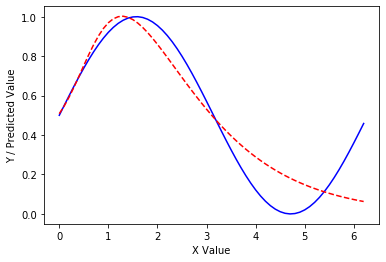

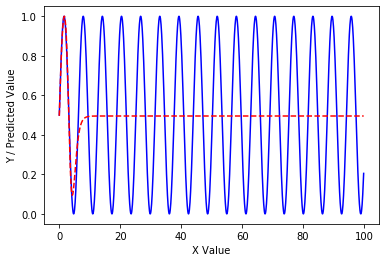

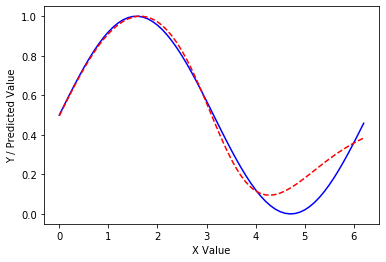

In [16]:
# learning the sine curve for a large interval based on the model trained on an inital small interval
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import math

xorg = np.arange(0, math.pi*2, .1)   # the initial small interval
yorg = (np.sin(xorg)+1)/2               # apply the transform

# define the model
model = Sequential([
    Dense(10, input_shape=(1,)),
    Activation('sigmoid'),
    Dense(1)
])

# compile and fit
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_squared_error'])
model.fit(xorg, yorg, epochs=1000, batch_size=8, verbose=0) # maybe more epochs are needed

# predict using the trained model
preds = model.predict(xorg)

# plot the results
plt.plot(xorg, yorg, 'b', xorg, preds, 'r--')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.show()

x = np.arange(0, 100, .1)       # large interval
y = (np.sin(x)+1)/2             # again taking the transformed function

# copy the already trained model
model_copy = model
# fit the copied model and fit it to the values from the large interval
model_copy.fit(x, y, epochs=1000, batch_size=8, verbose=0)   # maybe more epochs necessary
model_copy_preds = model_copy.predict(x)

# plot the result
plt.plot(x, y, 'b', x, model_copy_preds, 'r--')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.show()

# compare the predictions from the original and the new model
model_copy_preds = model_copy.predict(xorg)
plt.plot(xorg, yorg, 'b', xorg, model_copy_preds, 'r--')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.show()

In [17]:
# using LSTM
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

In [18]:
model = Sequential()
model.add(LSTM(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

In [19]:
def train_function(x):
    return np.sin(x)

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)

# define input sequence
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (3122, 20, 1)
y.shape = (3122,)


Epoch 1/20
3122/3122 [==============================] - 6s 2ms/step - loss: 0.3962
Epoch 2/20
3122/3122 [==============================] - 5s 2ms/step - loss: 0.1122
Epoch 3/20
3122/3122 [==============================] - 5s 2ms/step - loss: 0.0166
Epoch 4/20
3122/3122 [==============================] - 5s 2ms/step - loss: 0.0078
Epoch 5/20
3122/3122 [==============================] - 5s 2ms/step - loss: 0.0031
Epoch 6/20
3122/3122 [==============================] - 5s 2ms/step - loss: 0.0017
Epoch 7/20
3122/3122 [==============================] - 5s 2ms/step - loss: 0.0010
Epoch 8/20
3122/3122 [==============================] - 5s 2ms/step - loss: 6.5146e-04
Epoch 9/20
3122/3122 [==============================] - 5s 2ms/step - loss: 4.4058e-04
Epoch 10/20
3122/3122 [==============================] - 5s 2ms/step - loss: 3.2307e-04
Epoch 11/20
3122/3122 [==============================] - 5s 2ms/step - loss: 2.4391e-04
Epoch 12/20
3122/3122 [==============================] - 5s 2ms/step 

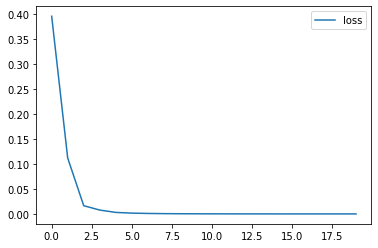

In [20]:
history = model.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

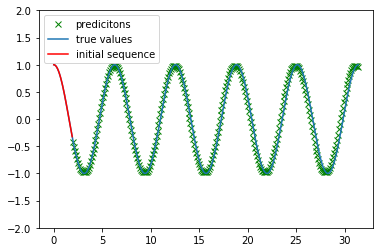

In [21]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)

def test_function(x):
    return np.cos(x)

calc_y = test_function(test_xaxis)

# start with initial n values, rest will be predicted
test_y = calc_y[:n_steps]
results = []

for i in range( len(test_xaxis) - n_steps ):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)

plt.plot(test_xaxis[n_steps:], test_y[n_steps:], 'gx', label="predicitons")
plt.plot(test_xaxis, calc_y, label="true values")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="initial sequence", color="red")
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()